In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# December 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

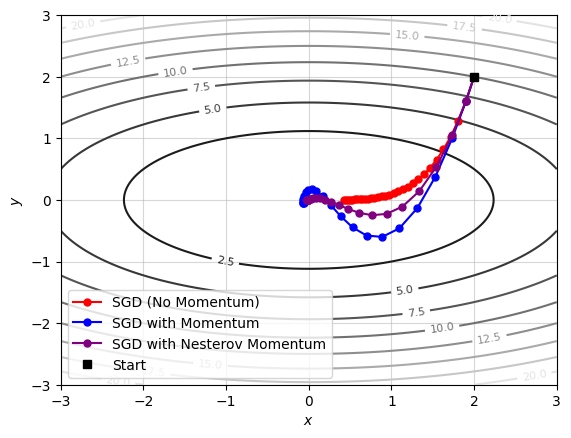

In [3]:
# Define the function and its gradient
# f(x, y) = 0.5*x^2 + 2*y^2
# grad f(x, y) = [x, 4y]
def f(x, y):
    return 0.5*x**2 + 2*y**2

def grad_f(x, y):
    return np.array([x, 4*y])

alpha = 0.05      # learning rate
beta = 0.7        # momentum
steps = 30
initial_point = np.array([2.0, 2.0])
noise_std = 0.1    

# SGD without Momentum
x_sgd = [initial_point.copy()]
current = initial_point.copy()
for _ in range(steps):
    # Add noise to the gradient
    g = grad_f(current[0], current[1])
    current = current - alpha * g
    x_sgd.append(current.copy())
x_sgd = np.array(x_sgd)

# SGD with Momentum
x_mom = [initial_point.copy()]
current = initial_point.copy()
v = np.zeros_like(current)
for _ in range(steps):
    g = grad_f(current[0], current[1])
    v = beta * v + alpha * g
    current = current - v
    x_mom.append(current.copy())
x_mom = np.array(x_mom)

# SGD with Nesterov Momentum
x_nesterov = [initial_point.copy()]
current = initial_point.copy()
v = np.zeros_like(current)
for _ in range(steps):
    # Lookahead position
    lookahead = current - beta * v
    g = grad_f(lookahead[0], lookahead[1])
    v = beta * v + alpha * g
    current = current - v
    x_nesterov.append(current.copy())
x_nesterov = np.array(x_nesterov)

# Create a grid of points to plot the contour of f(x, y)
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Plotting
fig, ax = plt.subplots()

# Contours
contours = ax.contour(X, Y, Z, levels=10, cmap='gray')
ax.clabel(contours, inline=True, fontsize=8)

# Trajectories
ax.plot(x_sgd[:,0], x_sgd[:,1], 'o-', color='red', markersize=5, label='SGD (No Momentum)')
ax.plot(x_mom[:,0], x_mom[:,1], 'o-', color='blue', markersize=5, label='SGD with Momentum')
ax.plot(x_nesterov[:,0], x_nesterov[:,1], 'o-', color='purple', markersize=5, label='SGD with Nesterov Momentum')

# Mark start point
ax.plot(initial_point[0], initial_point[1], 'ks', label='Start')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(alpha=0.5)

plt.savefig('figures/momentum.pdf')